In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import csv
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
import datetime as dt
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数

In [3]:
df = pd.read_csv("ks-projects-201801.csv")

In [4]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [25]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [8]:
#欠損値の除外
df_dna=df.dropna(how="any")

In [9]:
df_dna.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [10]:
df_dna["state"].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

In [11]:
#failedとsuccessfulの2値分類問題とする
df_suc=df_dna[df_dna["state"]=="successful"]
df_fail=df_dna[df_dna["state"]=="failed"]

In [12]:
#結合
df_concat=pd.concat([df_suc,df_fail])

In [13]:
#successful=1, failed=0

le=LabelEncoder()

le=le.fit(df_concat["state"])
df_concat["state"]=le.transform(df_concat["state"])

In [14]:
#期間を変数として導入する
df_concat["deadline"]=pd.to_datetime(df_concat["deadline"],errors="coerce")
df_concat["launched"]=pd.to_datetime(df_concat["launched"],errors="coerce")


In [15]:
df_concat["period"]=(df_concat["deadline"]-df_concat["launched"]).dt.days
df_concat=df_concat.drop(["deadline","launched"],axis=1)
df_concat.head()

,ID,name,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,period
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,50000.0,52375.0,1,224,US,52375.00,52375.00,50000.00,34
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,1000.0,1205.0,1,16,US,1205.00,1205.00,1000.00,19
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,12500.0,12700.0,1,100,US,12700.00,12700.00,12500.00,29
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,5000.0,94175.0,1,761,GB,57763.78,121857.33,6469.73,27
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,250.0,250.0,1,7,US,250.00,250.00,250.00,14


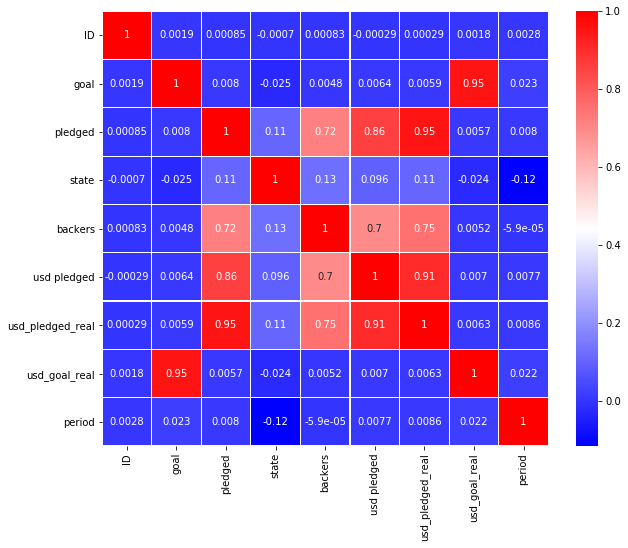

In [16]:
sns.heatmap(df_concat.corr(),annot=True,cmap='bwr',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

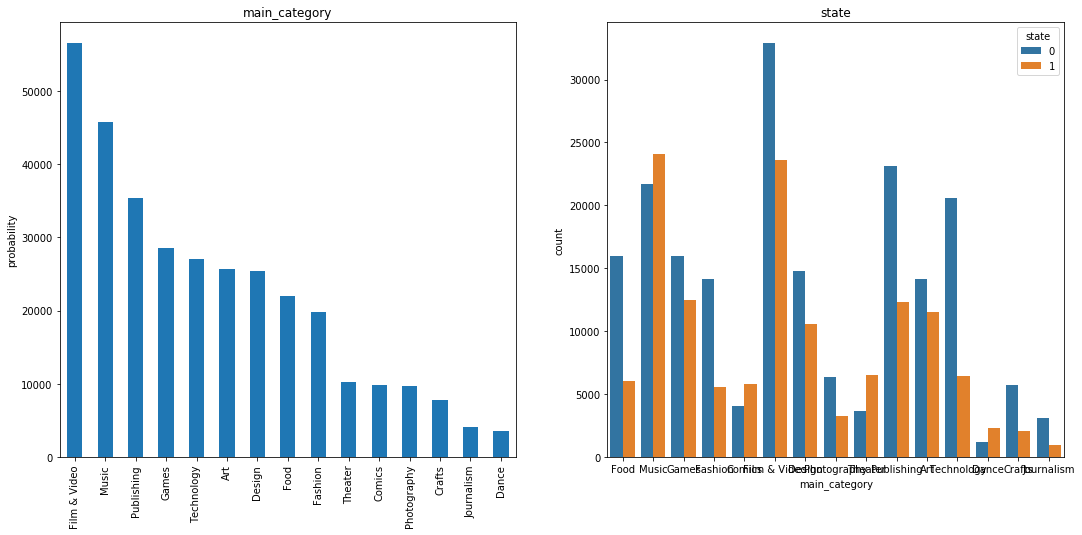

In [47]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_concat['main_category'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('main_category')
ax[0].set_ylabel('probability')
sns.countplot('main_category',hue='state',data=df_concat,ax=ax[1])
ax[1].set_title('state')
plt.show()
#水準数が多く難しそう

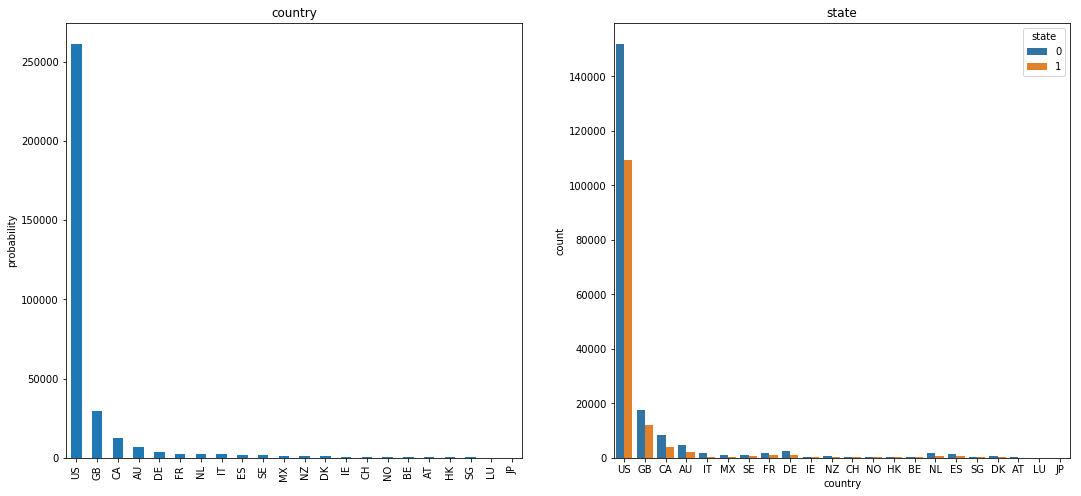

In [48]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_concat['country'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('country')
ax[0].set_ylabel('probability')
sns.countplot('country',hue='state',data=df_concat,ax=ax[1])
ax[1].set_title('state')
plt.show()
#大きな特徴はなさそう

In [17]:
df_concat.head()

,ID,name,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,period
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,50000.0,52375.0,1,224,US,52375.00,52375.00,50000.00,34
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,1000.0,1205.0,1,16,US,1205.00,1205.00,1000.00,19
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,12500.0,12700.0,1,100,US,12700.00,12700.00,12500.00,29
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,5000.0,94175.0,1,761,GB,57763.78,121857.33,6469.73,27
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,250.0,250.0,1,7,US,250.00,250.00,250.00,14


In [34]:
#goal,usd_goal_realとpledgedusd,pledged,usd_pledged_realの相関が強いため落とす
df_concat.drop(["usd_goal_real","usd pledged","usd_pledged_real"], axis=1)

,ID,name,category,main_category,currency,goal,pledged,state,backers,country,period
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,50000.0,52375.00,1,224,US,34
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,1000.0,1205.00,1,16,US,19
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,12500.0,12700.00,1,100,US,29
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,5000.0,94175.00,1,761,GB,27
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,250.0,250.00,1,7,US,14
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,20000.0,34268.00,1,624,US,34
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,175.0,701.66,1,66,US,19
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,10000.0,15827.00,1,147,US,29
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,17757.0,48905.00,1,571,CA,29
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,100.0,112.38,1,27,GB,29


In [36]:
#カテゴリカル変数も落とす
y = df_concat["state"].values
X = df_concat.drop(["usd_goal_real","usd pledged","usd_pledged_real","state","ID","name","category","main_category","currency","country"], axis=1).values

X

array([[5.0000e+04, 5.2375e+04, 2.2400e+02, 3.4000e+01],
       [1.0000e+03, 1.2050e+03, 1.6000e+01, 1.9000e+01],
       [1.2500e+04, 1.2700e+04, 1.0000e+02, 2.9000e+01],
       ...,
       [1.5000e+04, 2.0000e+01, 1.0000e+00, 4.5000e+01],
       [1.5000e+04, 2.0000e+02, 6.0000e+00, 3.0000e+01],
       [2.0000e+03, 5.2400e+02, 1.7000e+01, 2.7000e+01]])

In [41]:
# 各特徴量を平均0，分散1となるような前処理（標準化，詳しくはDAY2にて）を施す
std_scaler = StandardScaler() 


# fit_transform関数で標準化した特徴量X_scaledを得る
# 以降はX_scaledをモデルの学習等に使う
X_scaled = std_scaler.fit_transform(X)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3, )
clf.fit(X_scaled, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]


print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, '.format(w0, w1, w2, w3))

w0 = -0.967, w1 = -102.928, w2 = 15.582, w3 = 20.560, 


In [42]:
# ラベルを予測
y_est = clf.predict(X_scaled)

# 確率値を得る
y_est_proba = clf.predict_proba(X_scaled)

# 対数尤度を表示
# log_lossという関数は、負の対数尤度を返す
# normalizeという引数をTrueにすると、合計の対数尤度ではなく平均の対数尤度が計算される
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est_proba, normalize=False))) 



# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -110745.684
正答率 = 87.093%


In [43]:
# ラベルを予測
y_pred = clf.predict(X_scaled)

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# Precision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))

正答率（Accuracy） = 87.093%
適合率（Precision） = 93.080%
再現率（Recall） = 73.503%
F1値（F1-score） = 82.141%


In [44]:

from sklearn.ensemble import RandomForestClassifier


#n_estimators=100,500とかが実務で有用
clf = RandomForestClassifier(n_estimators=100, max_depth=2, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_scaled, y)
print("score=", clf.score(X_scaled, y))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)


score= 0.8480791161581116
[0.08199889 0.3247349  0.59267232 0.00059389]


In [45]:
X = X_scaled # scikit-learnに入力するために整形
n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使ってロジスティック回帰モデルを学習
    clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3, )
    clf.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = clf.predict(X_test)
    y_est = clf.predict(X_test)

    # 確率値を得る
    y_est_proba = clf.predict_proba(X_test)

    # 対数尤度を表示
    # log_lossという関数は、負の対数尤度を返す
    # normalizeという引数をTrueにすると、合計の対数尤度ではなく平均の対数尤度が計算される
    print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est_proba, normalize=False))) 
    # ラベルを予測
    y_pred = clf.predict(X_test)

    # 正答率を計算
    accuracy =  accuracy_score(y_test, y_pred)
    print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

    # Precision, Recall, F1-scoreを計算
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

    # Precision, Recall, F1-scoreを表示
    print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
    print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
    print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))
    
    
    split_num += 1


対数尤度 = -21646.778
正答率（Accuracy） = 87.257%
適合率（Precision） = 93.422%
再現率（Recall） = 73.445%
F1値（F1-score） = 82.238%
対数尤度 = -21946.567
正答率（Accuracy） = 87.050%
適合率（Precision） = 93.215%
再現率（Recall） = 73.302%
F1値（F1-score） = 82.068%
対数尤度 = -22379.200
正答率（Accuracy） = 87.590%
適合率（Precision） = 92.913%
再現率（Recall） = 75.195%
F1値（F1-score） = 83.120%
対数尤度 = -22173.301
正答率（Accuracy） = 87.253%
適合率（Precision） = 93.115%
再現率（Recall） = 74.047%
F1値（F1-score） = 82.494%
対数尤度 = -22494.661
正答率（Accuracy） = 87.317%
適合率（Precision） = 92.492%
再現率（Recall） = 74.430%
F1値（F1-score） = 82.484%
